In [1]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Preprocessing

In [2]:
df = pd.read_excel('stress_data.xlsx', header=1, keep_default_na=False)
df = df.where(df != '', None)
print(df.shape)

# only keep rows that have 3 or less empty columns
df.dropna(thresh=len(df.columns)-3, inplace=True)
print(df.shape)

(1138, 38)
(1112, 38)


In [3]:
student_info = df.iloc[:,:5].copy()
student_info.columns = ['Gender', 'Age', 'City', 'Gov assistance', 'Education level']

# for col in student_info.columns:
#     print(col, student_info[col].unique())

student_info.replace({'Age': {'22-29': '23-29'},
                      'Education level':{'High School ': 'High School', 'Undergraduate ' : 'Undergraduate', 'Graduate ': 'Graduate'}},
                      inplace=True)

# for col in student_info.columns:
#     sns.countplot(student_info[col])
#     plt.show()

# Column City has a relatively balanced distribution, so filling with random from the four cities
student_info['City'] = student_info['City'].apply(lambda x: str(np.random.choice(['Aqaba', 'Irbid', 'Amman', 'Ajlun'])) if pd.isna(x) else x)
student_info.fillna(student_info.mode().iloc[0], inplace=True)

student_info.head()

,Gender,Age,City,Gov assistance,Education level
0,Male,18-22,Aqaba,No,High School
1,Female,50 and older,Aqaba,No,Undergraduate
2,Male,50 and older,Aqaba,No,Undergraduate
3,Female,23-29,Irbid,No,Undergraduate
4,Female,50 and older,Aqaba,No,Undergraduate


In [4]:
food_security = df.iloc[:, 5:13].copy()
food_security.columns = ['20 mins exercise', 'Breakfast', 'Whole grain', 'Dairy', 'Caffeine', 'Fruits', 'Greens', 'Fish']

# for col in food_security.columns:
#     print(col, food_security[col].unique())

food_security.replace({'20 mins exercise': {'None': 'Never', '6-7 times': '6 or 7 times'}}, inplace=True)
food_security.fillna(food_security.mode().iloc[0], inplace=True)

security_num = food_security.copy()
security_num.columns = ['Exercise_num', 'Breakfast_num', 'Whole grain_num', 'Dairy_num', 'Caffeine_num', 'Fruits_num', 'Greens_num', 'Fish_num']
security_num.replace({'Never': 1}, inplace=True)
security_num.where(security_num == 1, 0, inplace=True)
security_num = security_num.astype(int)

security_num['Total'] = security_num.sum(axis=1)
bins = [0, 1, 4, 8]
security_num['Food security'] = pd.cut(security_num['Total'], bins,
                                       labels=['High security', 'Low security', 'Very low security'], include_lowest=True)

food_security = pd.concat([food_security, security_num], axis=1)

food_security['Obesity level'] = df.iloc[1:, -1].copy()
food_security.fillna({'Obesity level': food_security['Obesity level'].mode().iloc[0]}, inplace=True)

# for col in food_security.columns:
#     sns.countplot(food_security[col])
#     plt.show()

food_security.head()

,20 mins exercise,Breakfast,Whole grain,Dairy,Caffeine,Fruits,Greens,Fish,Exercise_num,Breakfast_num,Whole grain_num,Dairy_num,Caffeine_num,Fruits_num,Greens_num,Fish_num,Total,Food security,Obesity level
0,3 times,5 times,Never,3 times,5 times or more,3 times,5 times or more,2 times,0,0,1,0,0,0,0,0,1,High security,Low Obesity
1,4 times,6 or 7 times,3 times,1 time,5 times or more,3 times,4 times,2 times,0,0,0,0,0,0,0,0,0,High security,Low Obesity
2,Never,6 or 7 times,1 time,5 times or more,5 times or more,3 times,3 times,1 time,1,0,0,0,0,0,0,0,1,High security,Low Obesity
3,3 times,2 times,Never,3 times,2 times,3 times,4 times,4 times,0,0,1,0,0,0,0,0,1,High security,Mid Obesity
4,5 times,6 or 7 times,2 times,3 times,2 times,4 times,3 times,1 time,0,0,0,0,0,0,0,0,0,High security,Low Obesity


In [5]:
resilience = df.iloc[:, 13:19].copy()
resilience.columns = ['Q'+str(x) for x in list(range(1,7))]

# for col in resilience.columns:
#     print(col, resilience[col].unique())

# for col in resilience.columns:
#     sns.countplot(resilience[col].astype(str))
#     plt.show()

resilience.fillna(resilience.mode().iloc[0], inplace=True)
resilience = resilience.astype(int)

reverse = {5: 1, 1: 5, 4: 2, 2: 4}
reverse_cols = ['Q2', 'Q4', 'Q6']
resilience[reverse_cols] = resilience[reverse_cols].replace(reverse)

resilience['Total'] = resilience.sum(axis=1)

bins = [6, 13, 21, 30]
resilience['Resilience'] = pd.cut(resilience['Total'], bins,
                                  labels=['Low resilience', 'Normal resilience', 'High resilience'], include_lowest=True)

resilience.head()

C:\Users\Obaid\AppData\Local\Temp\ipykernel_35524\2400989304.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resilience.fillna(resilience.mode().iloc[0], inplace=True)


,Q1,Q2,Q3,Q4,Q5,Q6,Total,Resilience
0,4,2,4,4,3,5,22,High resilience
1,4,4,4,5,4,4,25,High resilience
2,5,5,5,5,5,5,30,High resilience
3,3,2,2,2,2,3,14,Normal resilience
4,4,4,4,4,4,4,24,High resilience


In [6]:
mindset = df.iloc[:, 19:27].copy()
mindset.columns = ['Q'+str(x) for x in list(range(1,9))]

# for col in mindset.columns:
#     print(col, mindset[col].unique())

mindset = mindset.replace({'Neither Agree nor Disagree': '2', 'Agree': '3', 'Strongly disagree': '0', 'Disagree': '1',
                         'Neither Agree nor DIsagree': '2', 'Strongly Disagree': '0', 'Strongly Agree': '4'})

# for col in mindset.columns:
#     sns.countplot(mindset[col].astype(str))
#     plt.show()

mindset.fillna(mindset.mode().iloc[0], inplace=True)
mindset = mindset.astype(int)

reverse = {4: 0, 0: 4, 3: 1, 1: 3}
reverse_cols = ['Q1', 'Q3', 'Q5', 'Q7']
mindset[reverse_cols] = mindset[reverse_cols].replace(reverse)

mindset['Total'] = mindset.sum(axis=1)

bins = [0, 10, 21, 32]
mindset['Mindset'] = pd.cut(mindset['Total'], bins,
                          labels=['Debilitating effect', 'Moderate effect', 'Enhancing effect'], include_lowest=True)

mindset.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Total,Mindset
0,2,3,1,3,1,0,3,2,15,Moderate effect
1,2,3,1,3,1,1,2,1,14,Moderate effect
2,2,2,1,0,2,3,1,0,11,Moderate effect
3,3,3,1,3,1,1,1,2,15,Moderate effect
4,2,2,1,2,3,1,3,2,16,Moderate effect


In [7]:
distress = df.iloc[:, 27:37].copy()
distress.columns = ['Q'+str(x) for x in list(range(1,11))]

# for col in distress.columns:
#     print(col, distress[col].unique())

# Assuming 'AlFairly Often never' has a 50% chance of being either 'Almost never' or 'Fairly often'
distress[['Q9', 'Q10']] = distress[['Q9', 'Q10']].map(lambda x: str(np.random.choice(['Almost never', 'Fairly often'])) if x == 'AlFairly Often never' else x)
distress = distress.replace({'Very Often': 'Very often', 'Fairly Often': 'Fairly often'})

# for col in distress.columns:
#     sns.countplot(distress[col])
#     plt.show()

distress.fillna(distress.mode().iloc[0], inplace=True)

distress = distress.replace({'Never': '1', 'Almost never': '2', 'Sometimes': '3', 'Fairly often': '4', 'Very often': '5'})
distress = distress.astype(int)

distress['Total'] = distress.sum(axis=1)

bins = [10, 19, 29, 50]
distress['Distress'] = pd.cut(distress['Total'], bins,
                              labels=['Likely well', 'Moderate', 'Severe'], include_lowest=True)

distress.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Total,Distress
0,3,3,4,3,4,2,4,3,3,4,33,Severe
1,3,3,3,4,3,2,2,2,2,4,28,Moderate
2,2,3,2,4,3,4,2,2,2,1,25,Moderate
3,4,3,4,3,3,3,4,3,4,3,34,Severe
4,2,2,3,4,3,2,2,2,2,1,23,Moderate


## Questions

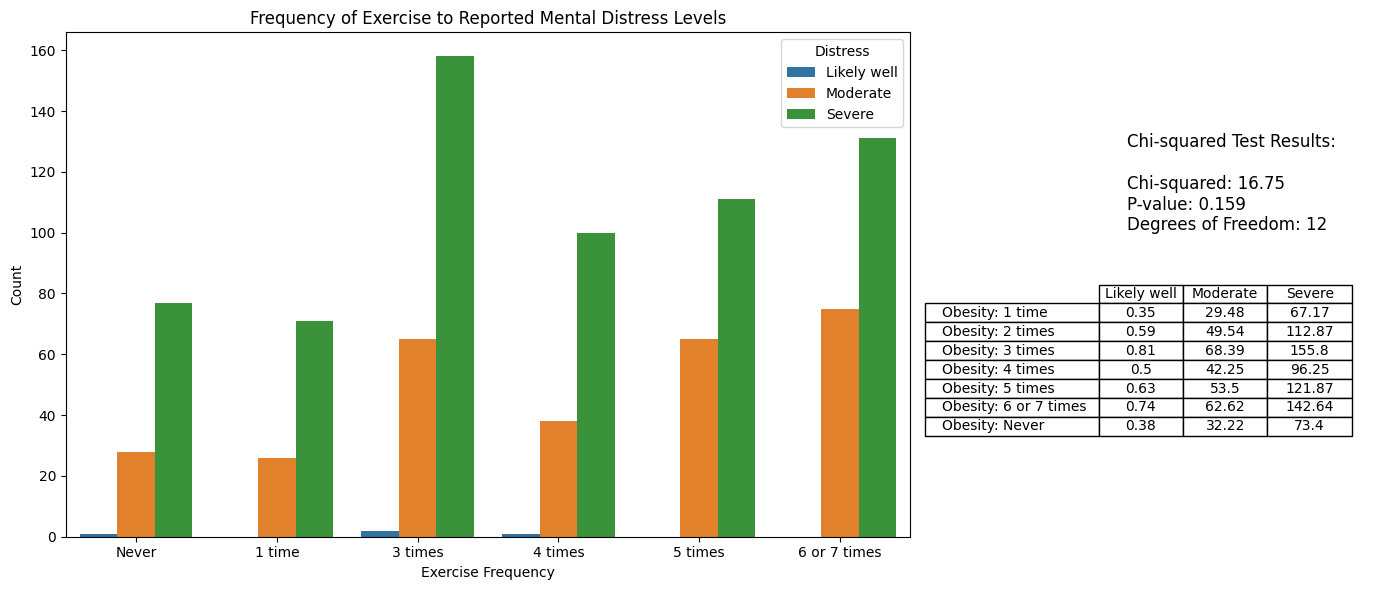

No relation: no indication of a trend in the graph and p-value > 0.05 for the chi-squared test


In [8]:
q11 = pd.concat([food_security['20 mins exercise'], distress['Distress']], axis=1)

contingency_table = pd.crosstab(q11['20 mins exercise'], q11['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q11, x='20 mins exercise', hue='Distress', order=['Never', '1 time', '3 times', '4 times', '5 times', '6 or 7 times'], ax=ax1)
ax1.set_title("Frequency of Exercise to Reported Mental Distress Levels")
ax1.set_xlabel("Exercise Frequency")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Obesity: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""No relation: no indication of a trend in the graph and p-value > 0.05 for the chi-squared test"""
)


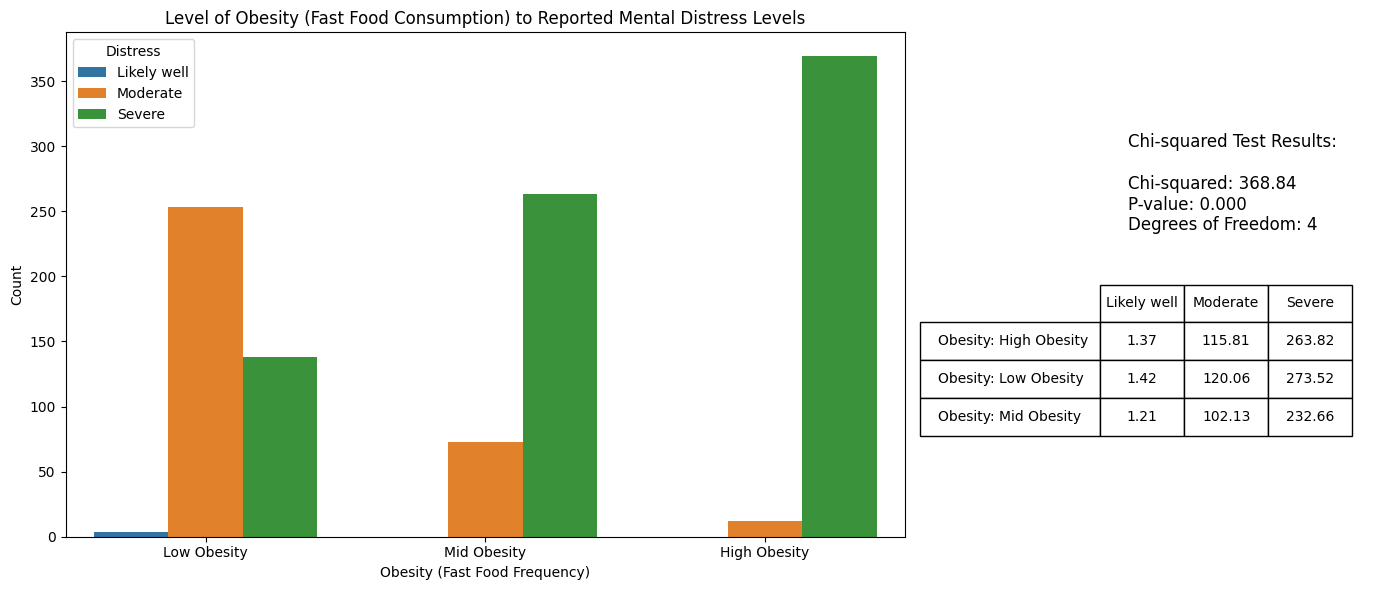

Assuming fast food is directly linked, we can see that the severity of distress becomes more and more the more obese
This is further supported by having a p-value < 0.05


In [9]:
q12 = pd.concat([food_security['Obesity level'], distress['Distress']], axis=1)

contingency_table = pd.crosstab(q12['Obesity level'], q12['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q12, x='Obesity level', hue='Distress', order=['Low Obesity', 'Mid Obesity', 'High Obesity'], ax=ax1)
ax1.set_title("Level of Obesity (Fast Food Consumption) to Reported Mental Distress Levels")
ax1.set_xlabel("Obesity (Fast Food Frequency)")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Obesity: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Assuming fast food is directly linked, we can see that the severity of distress becomes more and more the more obese
This is further supported by having a p-value < 0.05"""
)

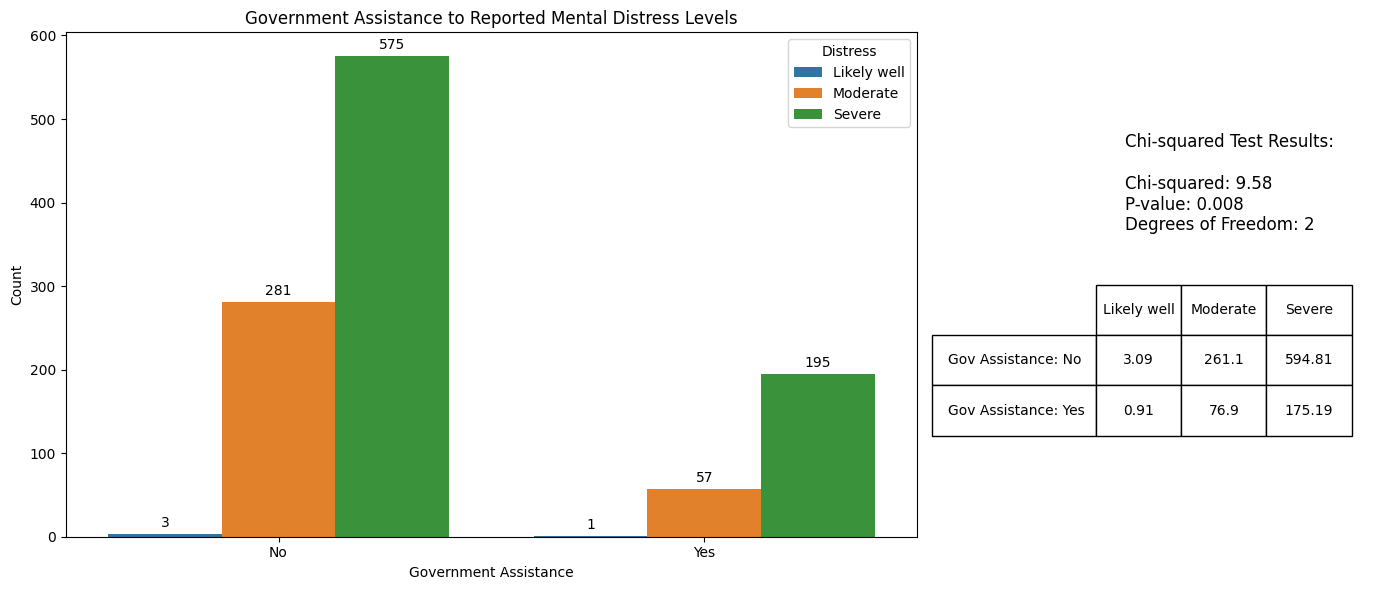

Looking visually, there doesn't seem to be a difference
After doing the chi-squared test and seeing the p-value < 0.05, I added to show the exact frequencies to the graph
When there is government assistance, the ratio of severe/moderate mental distress levels increases 2 -> 3.5,
implying that people are more likely to report severe mental distress levels rather than moderate ones when there is government assistance


In [10]:
q21 = pd.concat([student_info['Gov assistance'], distress['Distress']], axis=1)

contingency_table = pd.crosstab(q21['Gov assistance'], q21['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q21, x='Gov assistance', hue='Distress', ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)
ax1.set_title("Government Assistance to Reported Mental Distress Levels")
ax1.set_xlabel("Government Assistance")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Gov Assistance: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Looking visually, there doesn't seem to be a difference
After doing the chi-squared test and seeing the p-value < 0.05, I added to show the exact frequencies to the graph
When there is government assistance, the ratio of severe/moderate mental distress levels increases 2 -> 3.5,
implying that people are more likely to report severe mental distress levels rather than moderate ones when there is government assistance"""
)

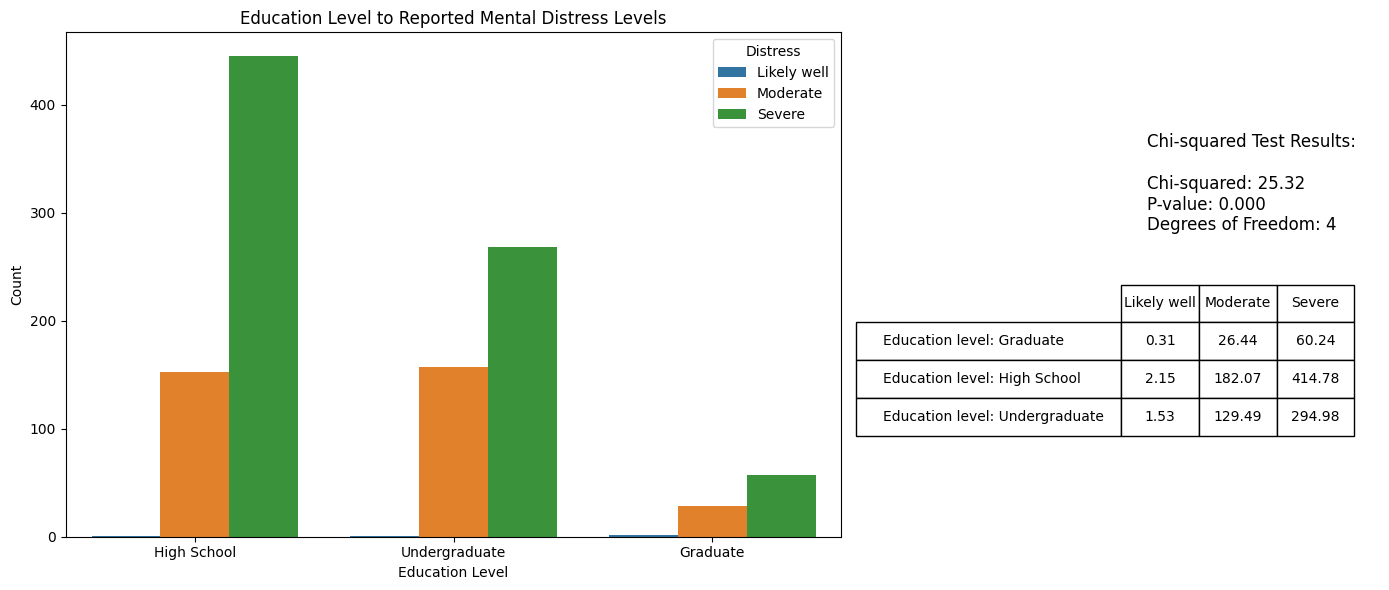

We can see in the graph that the amount of people that reported severity levels of distress become closer
to the amount of people that report moderate the higher level of education you go
Indicating that the higher level of education the lower the stress you report
This is further supported by having a p-value < 0.05


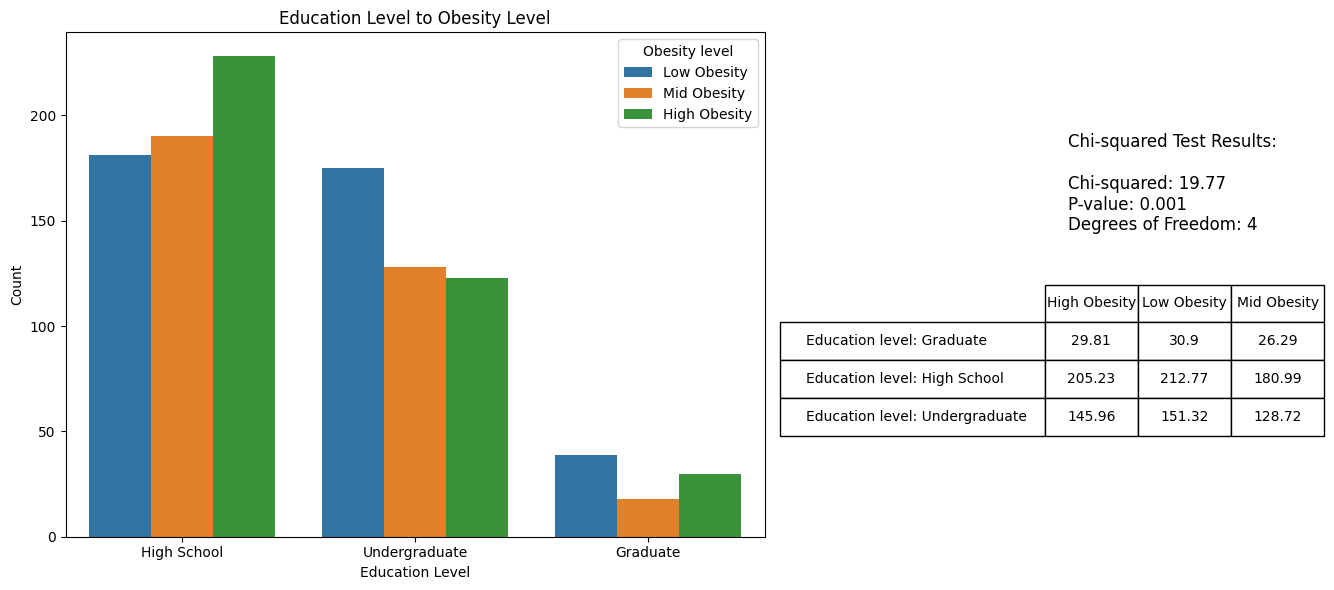

Visually we can see that if you're in high school you're more likely to find obese people compared to undergaduate and graduate
And that when you go to the graduate level, you're likely to find a divide between high obesity and low obesity with few mid obesity
Finding a dependency is further supported by having the p-value < 0.05


In [11]:
q22 = pd.concat([student_info['Education level'], food_security['Obesity level'], distress['Distress']], axis=1)

contingency_table = pd.crosstab(q22['Education level'], q22['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q22, x='Education level', hue='Distress', order=['High School', 'Undergraduate', 'Graduate'], ax=ax1)
ax1.set_title("Education Level to Reported Mental Distress Levels")
ax1.set_xlabel("Education Level")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Education level: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""We can see in the graph that the amount of people that reported severity levels of distress become closer
to the amount of people that report moderate the higher level of education you go
Indicating that the higher level of education the lower the stress you report
This is further supported by having a p-value < 0.05"""
)

contingency_table = pd.crosstab(q22['Education level'], q22['Obesity level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q22, x='Education level', hue='Obesity level', order=['High School', 'Undergraduate', 'Graduate'], ax=ax1)
ax1.set_title("Education Level to Obesity Level")
ax1.set_xlabel("Education Level")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Education level: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 1.2, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Visually we can see that if you're in high school you're more likely to find obese people compared to undergaduate and graduate
And that when you go to the graduate level, you're likely to find a divide between high obesity and low obesity with few mid obesity
Finding a dependency is further supported by having the p-value < 0.05"""
)

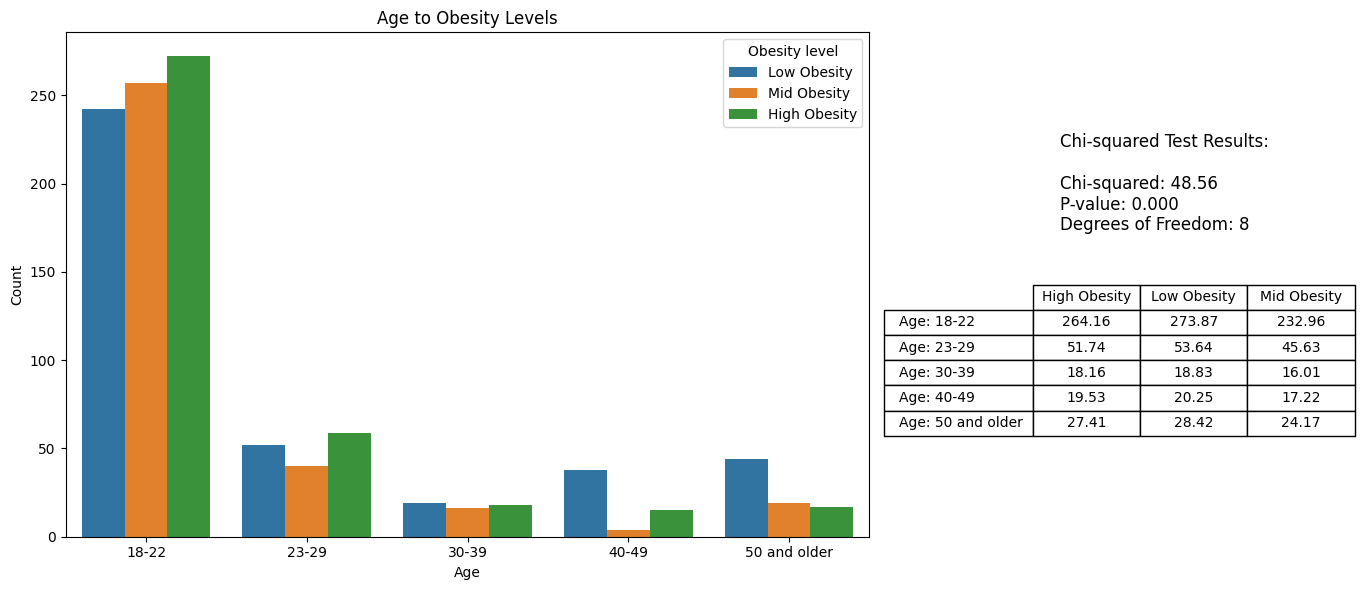

Looking visually, there's a clear indication that the older you are, the less obese
The dependancy is further supported by seeing that the p-value is < 0.05


In [12]:
q31 = pd.concat([student_info['Age'], food_security['Obesity level']], axis=1)

contingency_table = pd.crosstab(q31['Age'], q31['Obesity level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q31, x='Age', hue='Obesity level', order=['18-22', '23-29', '30-39', '40-49', '50 and older'], ax=ax1)
ax1.set_title("Age to Obesity Levels")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Age: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 1.2, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Looking visually, there's a clear indication that the older you are, the less obese
The dependancy is further supported by seeing that the p-value is < 0.05"""
)

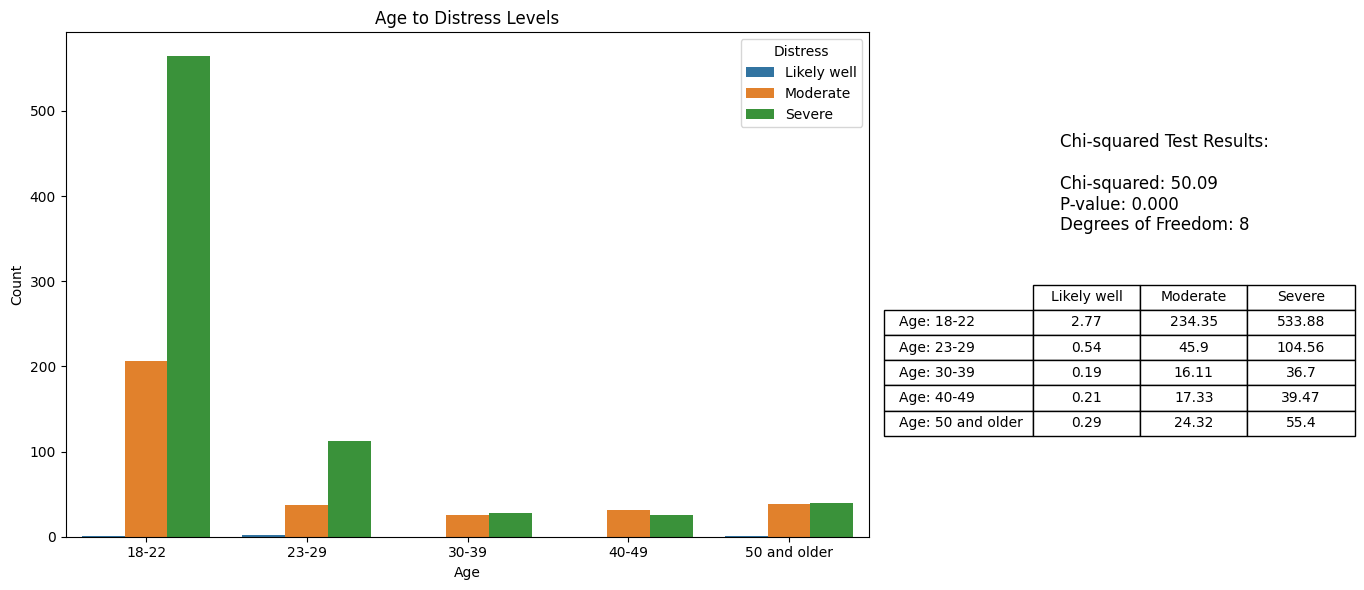

Looking visually, there's a clear indication that the older you are, the less distressed
The dependancy is further supported by seeing that the p-value is < 0.05


In [13]:
q32 = pd.concat([student_info['Age'], distress['Distress']], axis=1)

contingency_table = pd.crosstab(q32['Age'], q32['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q32, x='Age', hue='Distress', order=['18-22', '23-29', '30-39', '40-49', '50 and older'], ax=ax1)
ax1.set_title("Age to Distress Levels")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Age: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 1.2, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Looking visually, there's a clear indication that the older you are, the less distressed
The dependancy is further supported by seeing that the p-value is < 0.05"""
)

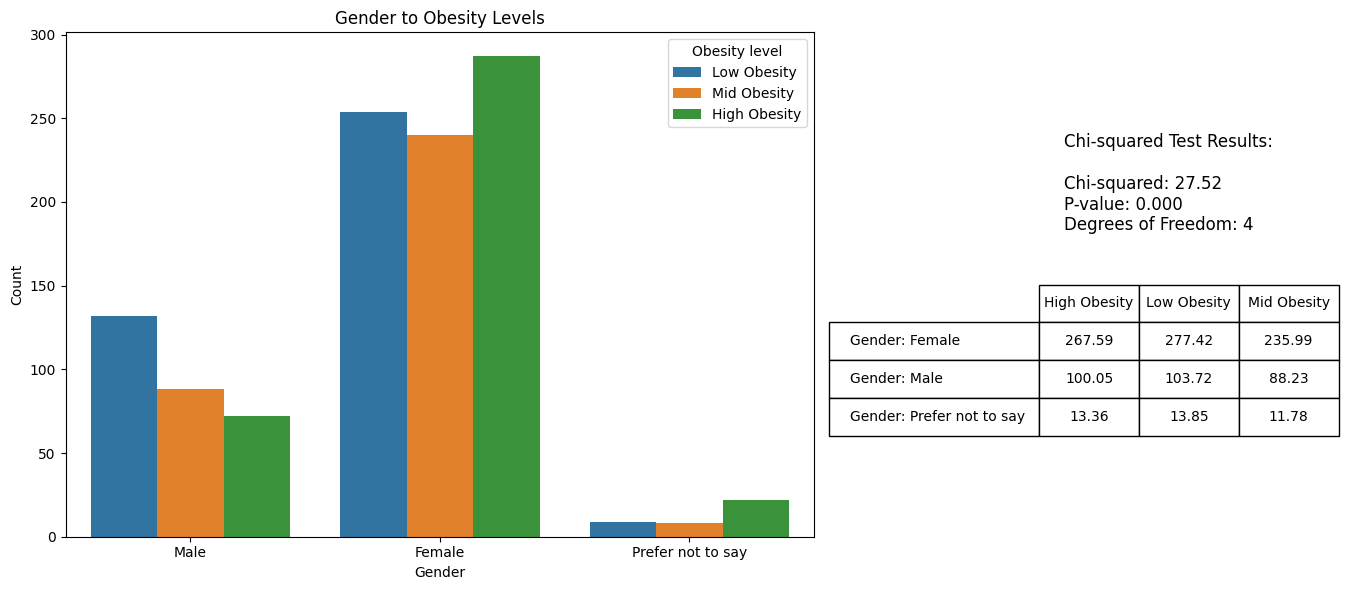

Looking visually, it appears that males are less obese than females
And people that do not want to disclose their gender are likely to be obese
The dependancy is further supported by seeing that the p-value is < 0.05


In [14]:
q41 = pd.concat([student_info['Gender'], food_security['Obesity level']], axis=1)

contingency_table = pd.crosstab(q41['Gender'], q41['Obesity level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q41, x='Gender', hue='Obesity level', ax=ax1)
ax1.set_title("Gender to Obesity Levels")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Gender: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 1.2, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Looking visually, it appears that males are less obese than females
And people that do not want to disclose their gender are likely to be obese
The dependancy is further supported by seeing that the p-value is < 0.05"""
)

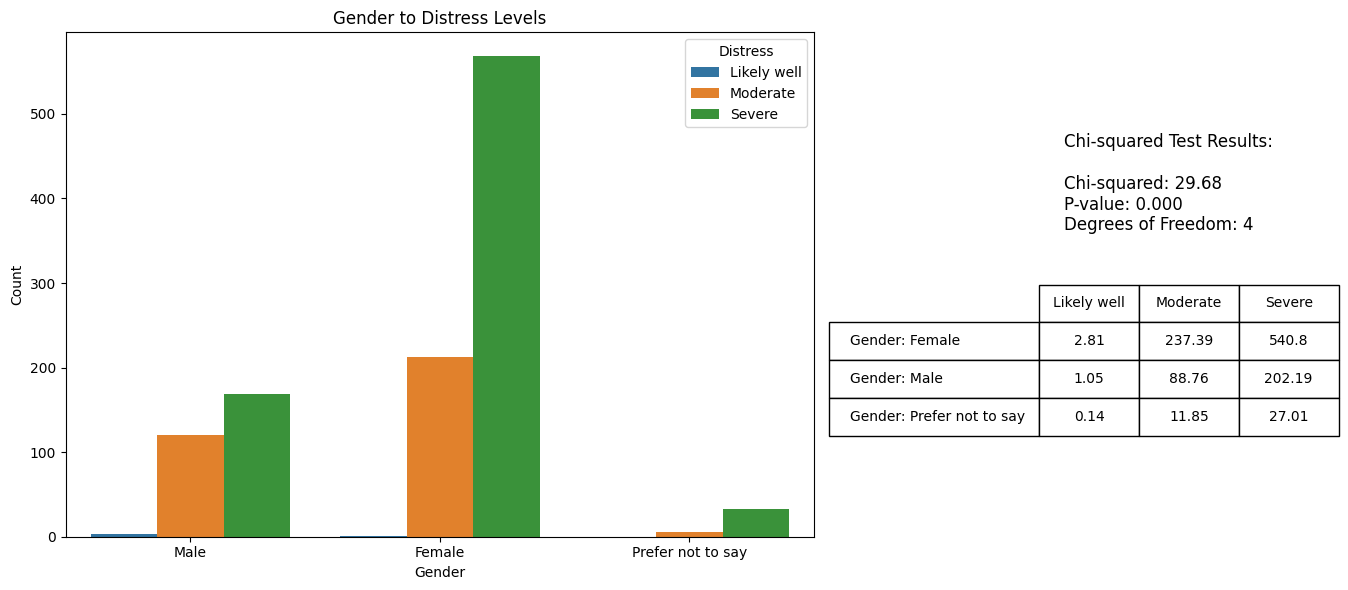

Looking visually, it appears that females are more likely to report high levels of distress than males
And people that do not want to disclose their gender are very likely to report high levels of distress than males
The dependancy is further supported by seeing that the p-value is < 0.05


In [15]:
q42 = pd.concat([student_info['Gender'], distress['Distress']], axis=1)

contingency_table = pd.crosstab(q42['Gender'], q42['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q42, x='Gender', hue='Distress', ax=ax1)
ax1.set_title("Gender to Distress Levels")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Gender: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 1.2, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Looking visually, it appears that females are more likely to report high levels of distress than males
And people that do not want to disclose their gender are very likely to report high levels of distress than males
The dependancy is further supported by seeing that the p-value is < 0.05"""
)

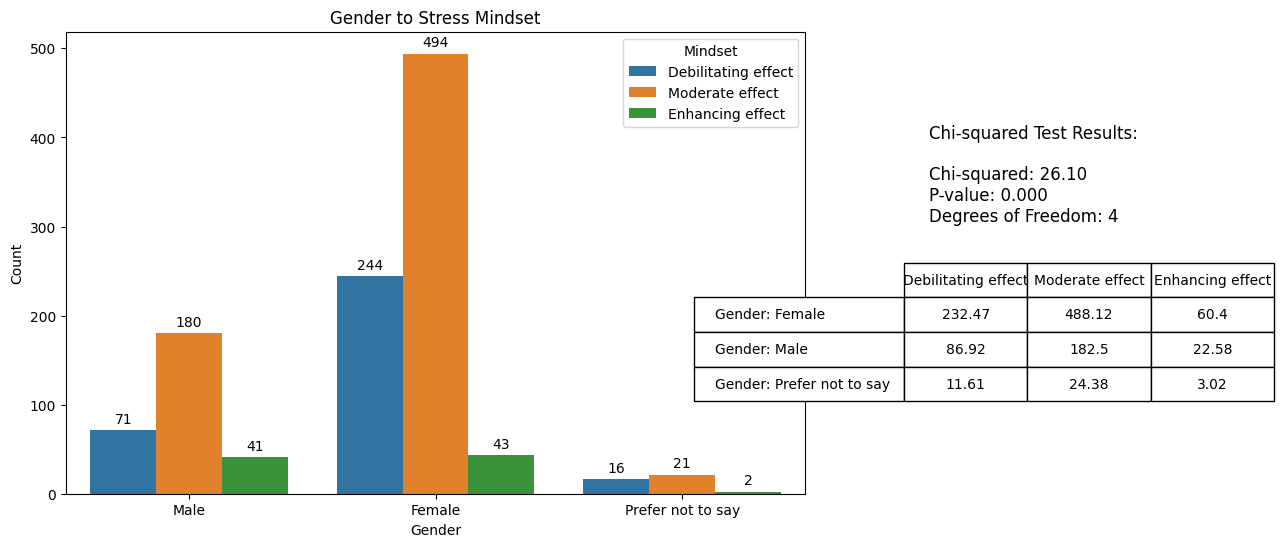

According to the data that females consider stress to have an enhancing effect compared to males appears false
And the other way around is true
As if you look at the expected numbers and compare them to the actual numbers, you can see that the males have a more enhancing effect than expected
And the females have less enhancing effect than expected
The dependancy is further supported by seeing that the p-value is < 0.05


In [16]:
q43 = pd.concat([student_info['Gender'], mindset['Mindset']], axis=1)

contingency_table = pd.crosstab(q43['Gender'], q43['Mindset'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q43, x='Gender', hue='Mindset', ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)
ax1.set_title("Gender to Stress Mindset")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Gender: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 1.5, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

# plt.tight_layout()
plt.show()

print(
"""According to the data that females consider stress to have an enhancing effect compared to males appears false
And the other way around is true
As if you look at the expected numbers and compare them to the actual numbers, you can see that the males have a more enhancing effect than expected
And the females have less enhancing effect than expected
The dependancy is further supported by seeing that the p-value is < 0.05"""
)

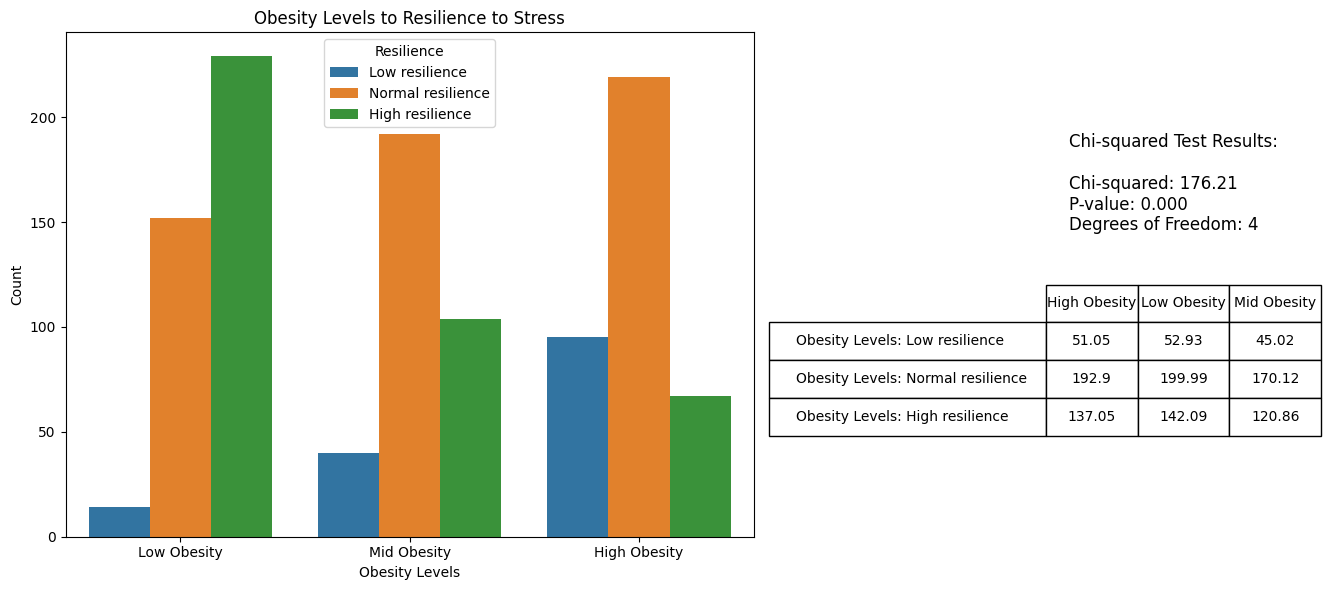

Looking visually, it's clear that the more obese the less resilience to stress
The dependancy is further supported by seeing that the p-value is < 0.05


In [17]:
q5 = pd.concat([resilience['Resilience'], food_security['Obesity level']], axis=1)

contingency_table = pd.crosstab(q5['Resilience'], q5['Obesity level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q5, x='Obesity level', hue='Resilience', order=['Low Obesity', 'Mid Obesity', 'High Obesity'], ax=ax1)
ax1.set_title("Obesity Levels to Resilience to Stress")
ax1.set_xlabel("Obesity Levels")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Obesity Levels: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 1.2, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""Looking visually, it's clear that the more obese the less resilience to stress
The dependancy is further supported by seeing that the p-value is < 0.05"""
)

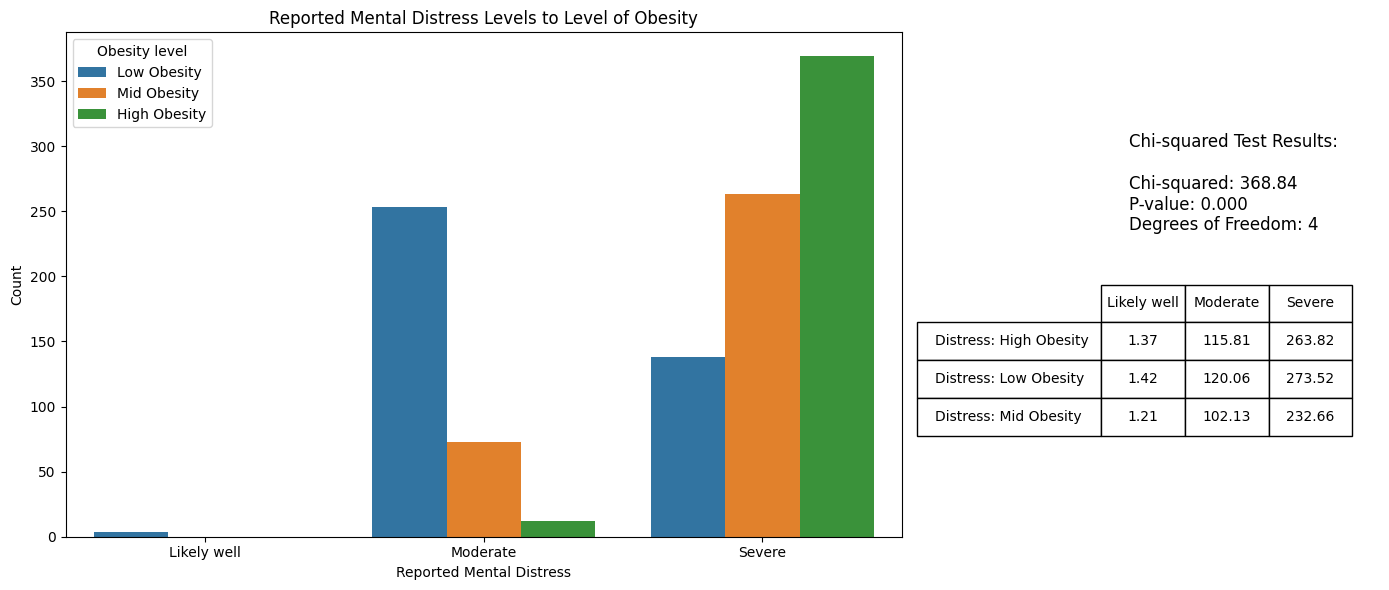

We can see in the chart that the higher level of distress you report, the more likely you are to be obese
This is further supported by having a p-value < 0.05


In [18]:
q6 = pd.concat([food_security['Obesity level'], distress['Distress']], axis=1)

contingency_table = pd.crosstab(q6['Obesity level'], q6['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q6, x='Distress', hue='Obesity level', order=['Likely well', 'Moderate', 'Severe'], ax=ax1)
ax1.set_title("Reported Mental Distress Levels to Level of Obesity")
ax1.set_xlabel("Reported Mental Distress")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"Distress: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""We can see in the chart that the higher level of distress you report, the more likely you are to be obese
This is further supported by having a p-value < 0.05"""
)

In [19]:
from statsmodels.graphics.mosaicplot import mosaic

q7 = pd.concat([resilience['Resilience'], distress['Distress'], mindset['Mindset']], axis=1)

freq_table = q7.groupby(['Resilience', 'Distress', 'Mindset'], observed=True).size().reset_index(name='Count')
mosaic_data = freq_table.set_index(['Resilience', 'Distress', 'Mindset'])['Count'].to_dict()
mosaic_data
# mosaic(mosaic_data, title="Mosaic Plot for Resilience, Distress, and Mindset")
# plt.show()

# Making a mosiac plot is not working, can't figure out why

{('Low resilience', 'Moderate', 'Debilitating effect'): 2,
 ('Low resilience', 'Moderate', 'Moderate effect'): 4,
 ('Low resilience', 'Severe', 'Debilitating effect'): 70,
 ('Low resilience', 'Severe', 'Moderate effect'): 70,
 ('Low resilience', 'Severe', 'Enhancing effect'): 3,
 ('Normal resilience', 'Moderate', 'Debilitating effect'): 29,
 ('Normal resilience', 'Moderate', 'Moderate effect'): 78,
 ('Normal resilience', 'Moderate', 'Enhancing effect'): 7,
 ('Normal resilience', 'Severe', 'Debilitating effect'): 153,
 ('Normal resilience', 'Severe', 'Moderate effect'): 278,
 ('Normal resilience', 'Severe', 'Enhancing effect'): 18,
 ('High resilience', 'Likely well', 'Debilitating effect'): 2,
 ('High resilience', 'Likely well', 'Moderate effect'): 2,
 ('High resilience', 'Moderate', 'Debilitating effect'): 44,
 ('High resilience', 'Moderate', 'Moderate effect'): 131,
 ('High resilience', 'Moderate', 'Enhancing effect'): 43,
 ('High resilience', 'Severe', 'Debilitating effect'): 31,
 ('

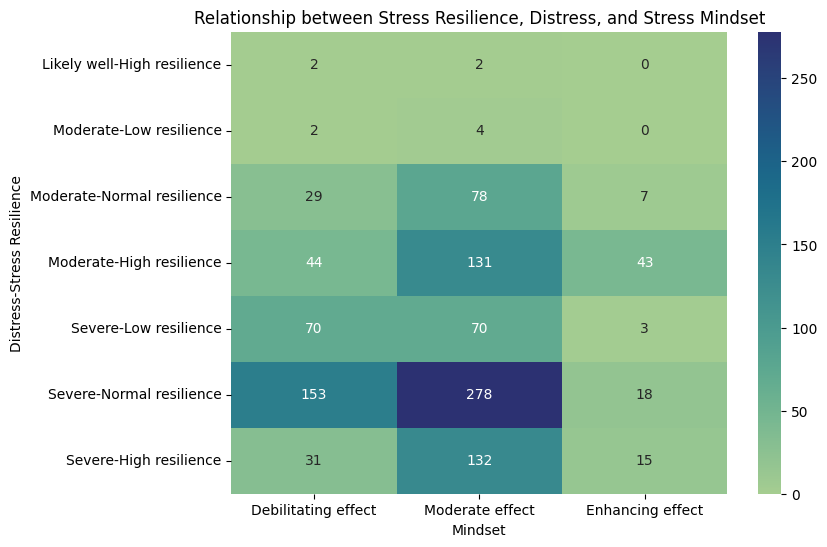

From the heat map we can see that a the odds of a person being likely well, with high stress resilience
and an enhancing stress mindset (best of everything) are very low
On the other hand, a person being in severe distress, having low stress resilience, and a debilitating effect from stress is quite common
We can also see that the most common combination is being severley distressed, having normal resilience and a moderate effect towards stress


In [20]:
q7 = pd.concat([resilience['Resilience'], distress['Distress'], mindset['Mindset']], axis=1)

heatmap_data = pd.crosstab(index=[q7['Distress'], q7['Resilience']], columns=q7['Mindset'])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='crest')
plt.title("Relationship between Stress Resilience, Distress, and Stress Mindset")
plt.xlabel("Mindset")
plt.ylabel("Distress-Stress Resilience")
plt.show()

print(
"""From the heat map we can see that a the odds of a person being likely well, with high stress resilience
and an enhancing stress mindset (best of everything) are very low
On the other hand, a person being in severe distress, having low stress resilience, and a debilitating effect from stress is quite common
We can also see that the most common combination is being severley distressed, having normal resilience and a moderate effect towards stress"""
)

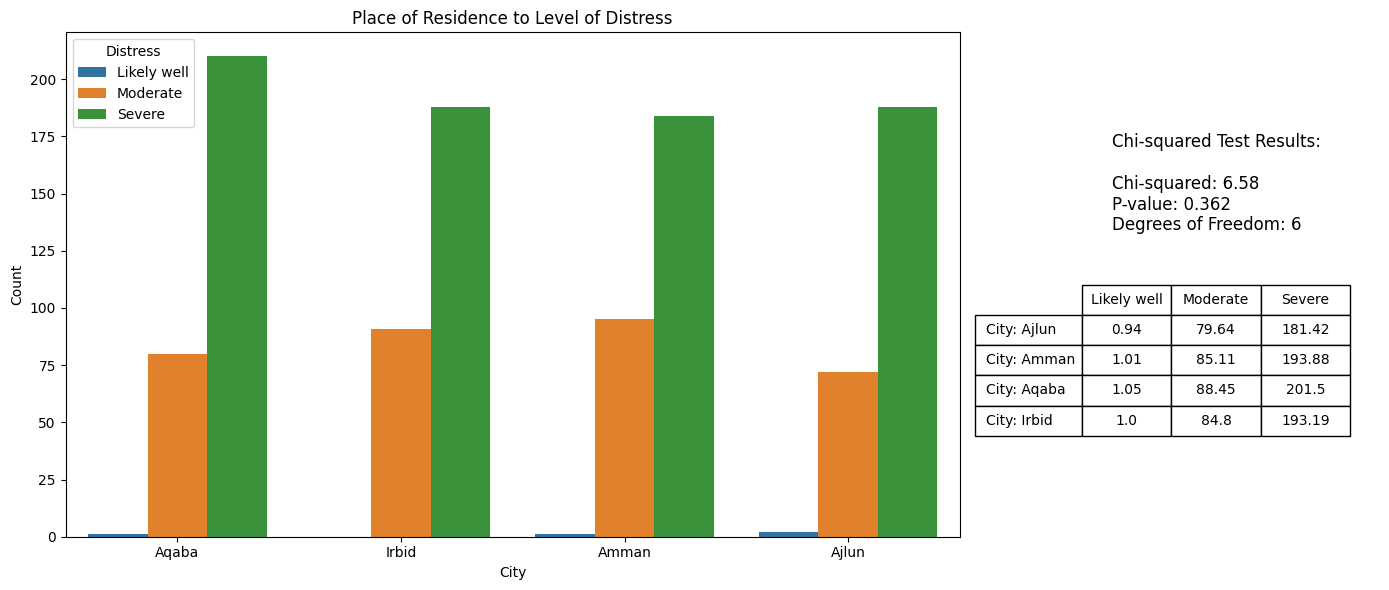

There doesn't seem to be a dependency between place of residence and reported levels of distress
This is further supported by having a p-value > 0.05


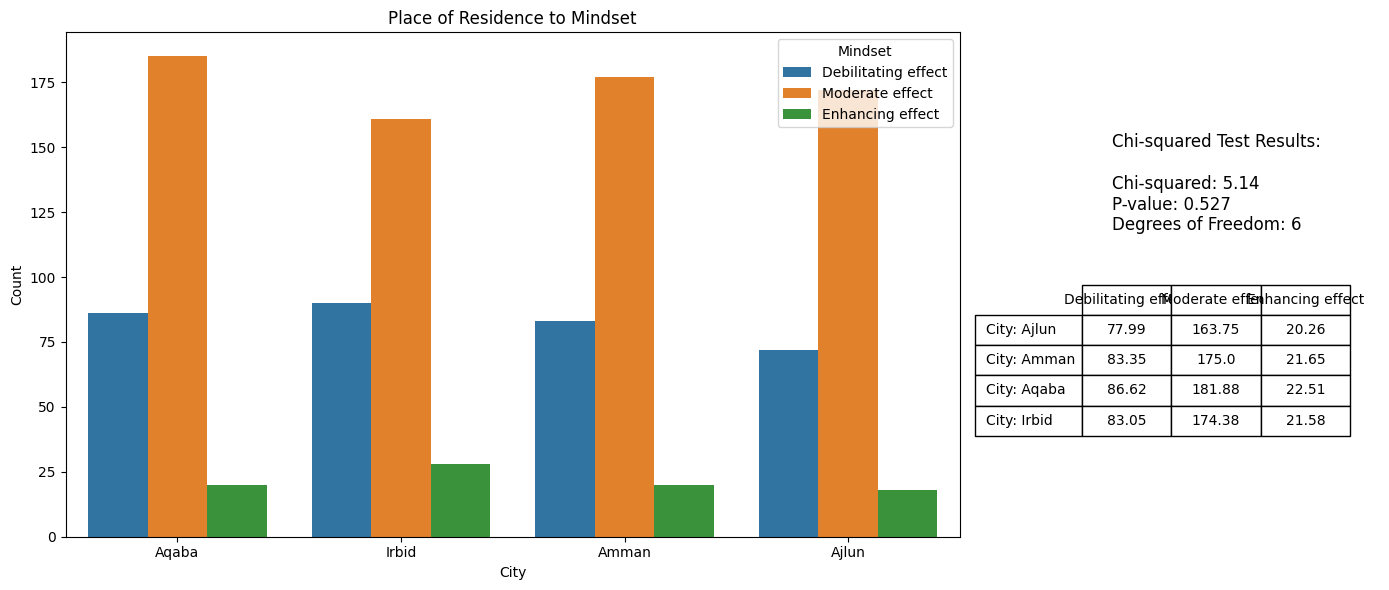

There doesn't seem to be a dependency between place of residence and stress mindset
This is further supported by having a p-value > 0.05


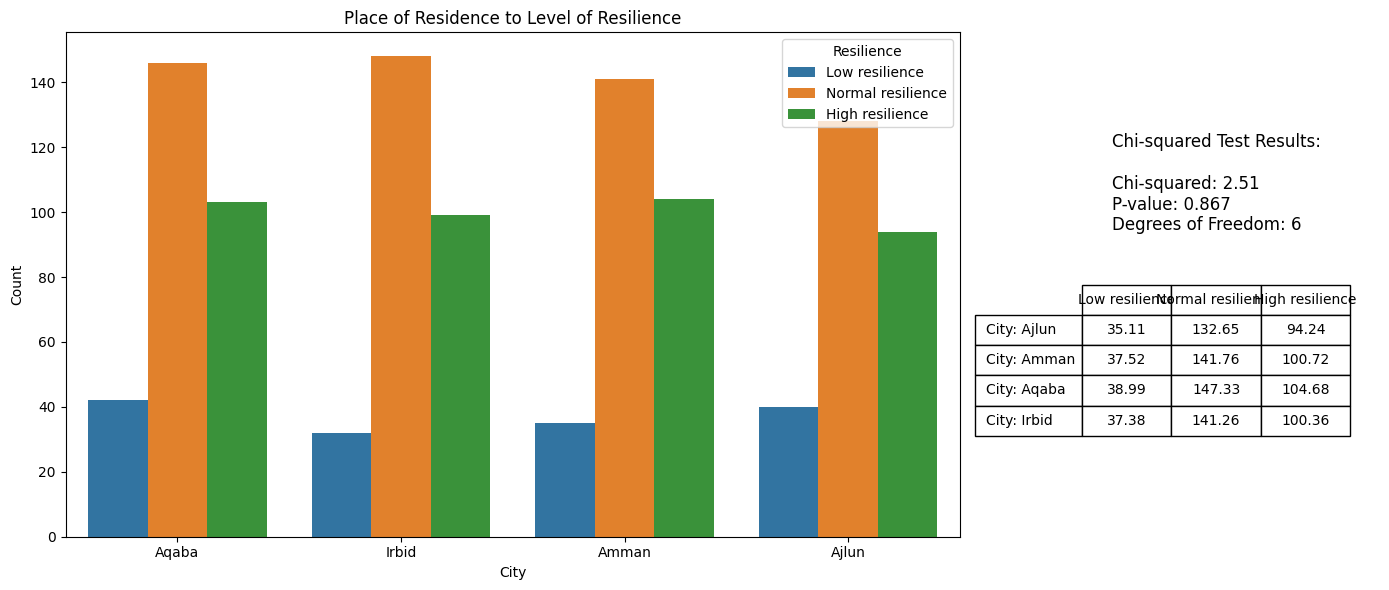

There doesn't seem to be a dependency between place of residence and resilience to stress
This is further supported by having a p-value > 0.05


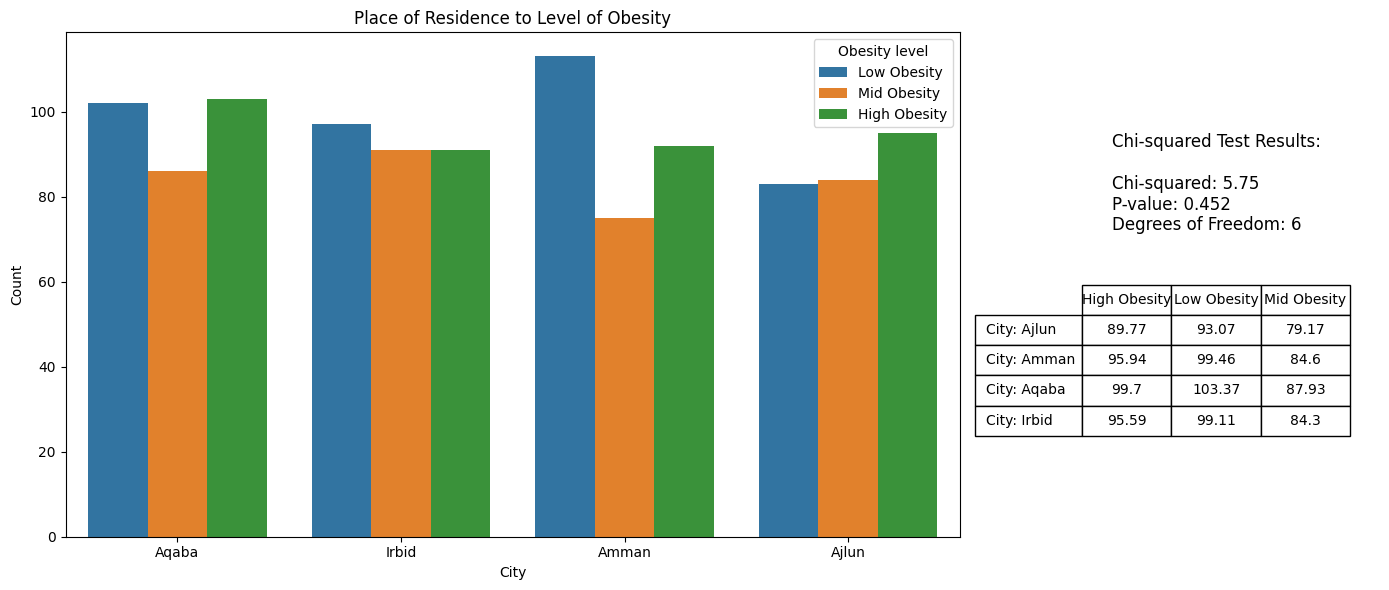

There doesn't seem to be a dependency between place of residence and levels of obesity
This is further supported by having a p-value > 0.05
However there seems to be a slight indication that people in Amman are more likely to be less obese and people in Ajlun are more likely to be obese


In [21]:
q8 = pd.concat([student_info['City'], food_security['Obesity level'], distress['Distress'], mindset['Mindset'], resilience['Resilience']], axis=1)

contingency_table = pd.crosstab(q8['City'], q8['Distress'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q8, x='City', hue='Distress', ax=ax1)
ax1.set_title("Place of Residence to Level of Distress")
ax1.set_xlabel("City")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"City: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""There doesn't seem to be a dependency between place of residence and reported levels of distress
This is further supported by having a p-value > 0.05"""
)

contingency_table = pd.crosstab(q8['City'], q8['Mindset'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q8, x='City', hue='Mindset', ax=ax1)
ax1.set_title("Place of Residence to Mindset")
ax1.set_xlabel("City")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"City: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""There doesn't seem to be a dependency between place of residence and stress mindset
This is further supported by having a p-value > 0.05"""
)

contingency_table = pd.crosstab(q8['City'], q8['Resilience'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q8, x='City', hue='Resilience', ax=ax1)
ax1.set_title("Place of Residence to Level of Resilience")
ax1.set_xlabel("City")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"City: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""There doesn't seem to be a dependency between place of residence and resilience to stress
This is further supported by having a p-value > 0.05"""
)

contingency_table = pd.crosstab(q8['City'], q8['Obesity level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = axes[0]
sns.countplot(data=q8, x='City', hue='Obesity level', ax=ax1)
ax1.set_title("Place of Residence to Level of Obesity")
ax1.set_xlabel("City")
ax1.set_ylabel("Count")

ax2 = axes[1]
ax2.axis('off')
results_text = (f"Chi-squared Test Results:\n\n"
                f"Chi-squared: {chi2:.2f}\n"
                f"P-value: {p:.3f}\n"
                f"Degrees of Freedom: {dof}")
ax2.text(0.1, 0.8, results_text, fontsize=12, verticalalignment='top')
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=[f"City: {label}" for label in contingency_table.index])
table = ax2.table(cellText=expected_df.round(2).values,
                  rowLabels=expected_df.index,
                  colLabels=expected_df.columns,
                  cellLoc='center',
                  bbox=[0.0, 0.2, 0.9, 0.3])
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()

print(
"""There doesn't seem to be a dependency between place of residence and levels of obesity
This is further supported by having a p-value > 0.05
However there seems to be a slight indication that people in Amman are more likely to be less obese and people in Ajlun are more likely to be obese"""
)

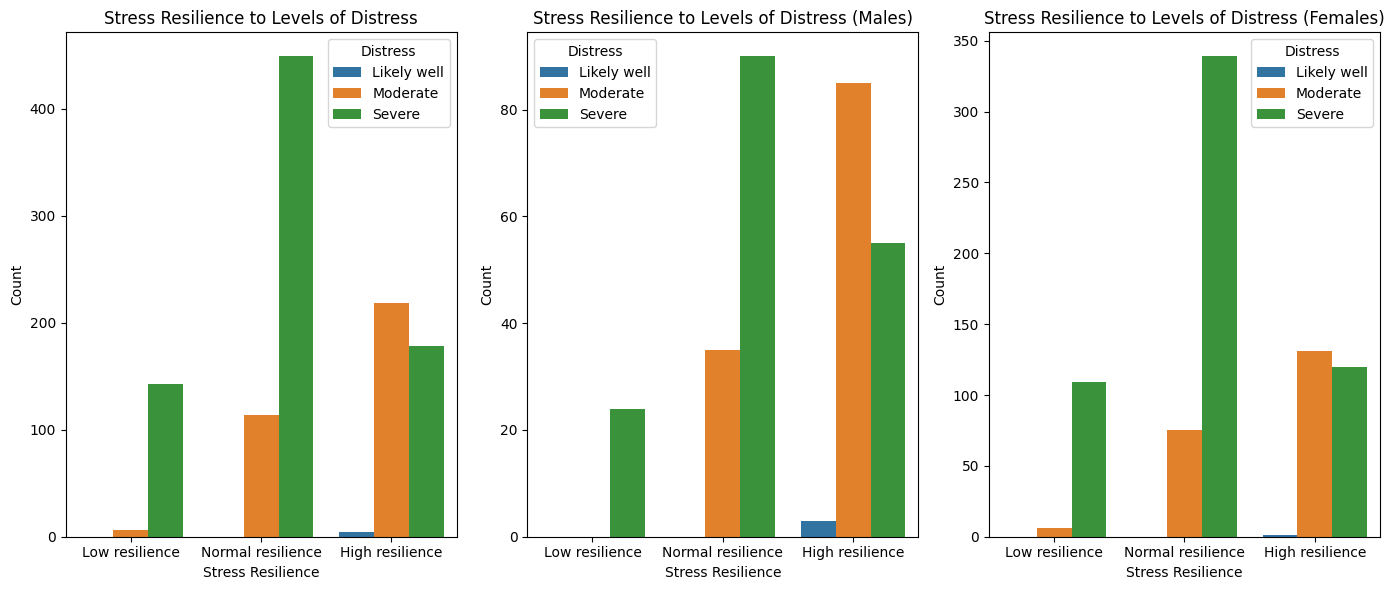

After seperating the data to males and females we can see that the dependency is still there
With the trend still staying the same, where the higher the resilience the more moderate the distress instead of severe
However, the strength of the trend is a bit weaker in females than males
So I do not agree that gender is a confounding variable between resilience and distress


In [22]:
q9 = pd.concat([resilience['Resilience'], distress['Distress'], student_info['Gender']], axis=1)
q9_male = pd.concat(
    [resilience.loc[student_info['Gender'] == 'Male', 'Resilience'],
     distress.loc[student_info['Gender'] == 'Male', 'Distress'],
     student_info.loc[student_info['Gender'] == 'Male', 'Gender']],
    axis=1
)
q9_female = pd.concat(
    [resilience.loc[student_info['Gender'] == 'Female', 'Resilience'],
     distress.loc[student_info['Gender'] == 'Female', 'Distress'],
     student_info.loc[student_info['Gender'] == 'Female', 'Gender']],
    axis=1
)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

ax1 = axes[0]
sns.countplot(data=q9, x='Resilience', hue='Distress', order=['Low resilience', 'Normal resilience', 'High resilience'], ax=ax1)
ax1.set_title("Stress Resilience to Levels of Distress")
ax1.set_xlabel("Stress Resilience")
ax1.set_ylabel("Count")

ax2 = axes[1]
sns.countplot(data=q9_male, x='Resilience', hue='Distress', order=['Low resilience', 'Normal resilience', 'High resilience'], ax=ax2)
ax2.set_title("Stress Resilience to Levels of Distress (Males)")
ax2.set_xlabel("Stress Resilience")
ax2.set_ylabel("Count")

ax3 = axes[2]
sns.countplot(data=q9_female, x='Resilience', hue='Distress', order=['Low resilience', 'Normal resilience', 'High resilience'], ax=ax3)
ax3.set_title("Stress Resilience to Levels of Distress (Females)")
ax3.set_xlabel("Stress Resilience")
ax3.set_ylabel("Count")

plt.tight_layout()
plt.show()

print(
"""After seperating the data to males and females we can see that the dependency is still there
With the trend still staying the same, where the higher the resilience the more moderate the distress instead of severe
However, the strength of the trend is a bit weaker in females than males
So I do not agree that gender is a confounding variable between resilience and distress"""
)